Most common frequency: 256.0

Second most common frequency: 250.0

Frequency with longest duration: 256.0

Frequency with second longest duration: 250.0

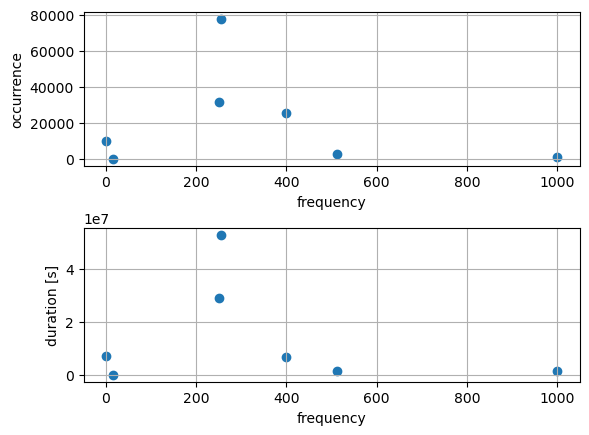

In [3]:
from collections import Counter
import glob
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import os
import pyedflib


edf_path = "/path/to/edf/files"


assert os.path.isdir(edf_path)


class EdfReader(object):
    def __init__(self, path: str):
        self.path = path
    
    def __enter__(self):
        self.file = pyedflib.EdfReader(self.path)
        return self.file
    
    def __exit__(self, *args):
        self.file.close()


edf_files = glob.glob(os.path.join(edf_path, "*.edf"))

occurences = Counter()
durations = Counter()

for edf_file in edf_files:
    with EdfReader(edf_file) as edf:
        frequencies = edf.getSampleFrequencies().tolist()
        num_samples = edf.getNSamples().tolist()
        assert len(frequencies) == len(num_samples)
        occurences.update(frequencies)
        for f, n in zip(frequencies, num_samples):
            durations[f] += n / f


plt.subplot(2, 1, 1)
plt.scatter(*zip(*occurences.items()))
plt.xlabel("frequency")
plt.ylabel("occurrence")
plt.grid()

plt.subplot(2, 1, 2)
plt.scatter(*zip(*durations.items()))
plt.xlabel("frequency")
plt.ylabel("duration [s]")
plt.grid()

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)


display(Markdown(f"Most common frequency: {occurences.most_common(1)[0][0]}"))
display(Markdown(f"Second most common frequency: {occurences.most_common(2)[1][0]}"))

display(Markdown(f"Frequency with longest duration: {durations.most_common(1)[0][0]}"))
display(Markdown(f"Frequency with second longest duration: {durations.most_common(2)[1][0]}"))